### Import Library
Di sini, kita akan mengimport berbagai macam library yang kita gunakan untuk melakukan analisis menggunakan algoritma Q Learngin. Algoritma yang digunakan, seperti pandas, numpy, pylab, dan numpy. Semua library tersebut, kita gunakan untuk melakukan proses pengolahan, analisis, dan visualisasi data.

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
import numpy as np

### Membaca Dataset
Di sini, kita akan membaca dataset dari file player_statistics_cleaned_final.csv. Kita simpan dataset ke dalam data frame atau di sini kita masukan ke dalam variable df.

In [4]:
df = pd.read_csv("player_statistics_cleaned_final.csv")
df

,TeamName,PlayerName,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,...,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Country,FlashKeybind
0,Top Esports,369,Top,8,0.500,3.1,2.5,2.4,4.9,7.6,...,0.13,322,5,424,0.000,0.250,0,2,China,D
1,Dplus KIA,aiming,Adc,9,0.333,4.8,5.0,2.0,4.7,10.1,...,0.10,-112,1,97,0.333,0.000,0,2,South Korea,F
2,MAD Lions KOI,alvaro,Support,5,0.200,1.5,0.2,4.4,6.2,1.2,...,0.49,-3,2,-256,0.000,0.600,0,-,Spain,D
3,Team Liquid,apa,Mid,10,0.500,2.4,3.5,3.2,4.2,8.7,...,0.18,278,2,216,0.400,0.000,0,3,United States,D
4,PSG Talon,azhi,Top,5,0.200,2.3,2.2,3.0,4.8,7.5,...,0.18,-311,-10,-168,0.200,0.000,0,-,Taiwan,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Team Liquid,yeon,Adc,10,0.500,4.9,3.8,1.8,5.0,10.0,...,0.16,224,6,571,0.500,0.000,0,-,United States,D
77,G2 Esports,yike,Jungle,8,0.375,4.5,3.1,2.4,7.6,6.4,...,0.22,102,4,-80,0.250,0.000,0,2,Sweden,D
78,Hanwha Life Esports,zeka,Mid,12,0.500,3.6,3.8,2.8,6.2,9.1,...,0.24,288,2,66,0.250,0.167,0,1,South Korea,F
79,T1,zeus,Top,8,0.875,7.1,3.9,1.6,7.6,7.9,...,0.19,633,8,370,0.125,0.000,0,2,South Korea,F


### Menampilkan Performa Player dari Masing-Masing Team
Di sini, kita akan melakukan sorting performa player dari masing-masing team. Setiap team memiliki performa yang berbeda-beda. Hal tersebut kita lakukan dengan tujuan untuk menganalisis masing-masing team secara terpisah.

In [6]:
team_groups = df.groupby('TeamName')
for team, data in team_groups:
    print(f"\nTeam: {team}")
    print(data[['PlayerName', 'Position', 'Games', 'Win rate', 'KDA']])


Team: Bilibili Gaming
   PlayerName Position  Games  Win rate  KDA
6         bin      Top     12     0.667  4.2
23        elk      Adc     12     0.667  4.4
42     knight      Mid     12     0.667  5.0
55         on  Support     12     0.667  2.7
70        wei   Jungle      3     0.333  3.1
75        xun   Jungle      9     0.778  5.3

Team: Dplus KIA
   PlayerName Position  Games  Win rate  KDA
1      aiming      Adc      9     0.333  4.8
41     kingen      Top      9     0.333  1.8
47      lucid   Jungle      9     0.333  1.7
52      moham  Support      9     0.333  1.9
63  showmaker      Mid      9     0.333  3.1

Team: FlyQuest
   PlayerName Position  Games  Win rate  KDA
9       busio  Support     14       0.5  3.7
10      bwipo      Top     14       0.5  1.7
34   inspired   Jungle     14       0.5  4.7
49      massu      Adc     14       0.5  4.4
60       quad      Mid     14       0.5  5.2

Team: Fnatic
   PlayerName Position  Games  Win rate  KDA
32   humanoid      Mid      6 

### Menghitung Rata-Rata Win Rate dan KDA
Di sini, kita akan melakukan penghitungan Win Rate dan KDA dari masing-masing team. Di dalamnya terdapat rata-rata Games, Win rate, dan KDA. Lalu, kita akan melakukan function aggregasi. Di mana kita akan menghitung rata-rata pada setiap kolom. Kita ubah kolom PlayerName menjadi list. Hal tersebut bertujuan untuk memudahkan kita melihat semua player yang berada dalam team yang sama.

In [8]:
team_groups_summary = df.groupby('TeamName').agg({
    'PlayerName': list,
    'Games': 'mean',
    'Win rate': 'mean',
    'KDA': 'mean'
}).reset_index()

team_groups_summary.columns = ['TeamName', 'PlayerList', 'Games', 'Win rate', 'Avg_KDA']
team_groups_summary

,TeamName,PlayerList,Games,Win rate,Avg_KDA
0,Bilibili Gaming,"[bin, elk, knight, on, wei, xun]",10.0,0.629833,4.116667
1,Dplus KIA,"[aiming, kingen, lucid, moham, showmaker]",9.0,0.333000,2.660000
2,FlyQuest,"[busio, bwipo, inspired, massu, quad]",14.0,0.500000,3.940000
3,Fnatic,"[humanoid, jun, noah, oscarinin, razork]",6.0,0.333000,3.220000
4,G2 Esports,"[brokenblade, caps, hans sama, mikyx, yike]",8.0,0.375000,3.340000
5,GAM Esports,"[easylove, elio, emo, kiaya, levi]",8.0,0.375000,3.000000
6,Gen.G,"[canyon, chovy, kiin, lehends, peyz]",10.0,0.700000,5.940000
7,Hanwha Life Esports,"[delight, doran, peanut, viper, zeka]",12.0,0.500000,3.500000
8,LNG Esports,"[gala, hang, scout, weiwei, zika]",8.0,0.625000,5.420000
9,MAD Lions KOI,"[alvaro, elyoya, fresskowy, myrwn, supa]",5.0,0.200000,1.480000


### Parameter Q Learning
Di sini, kita akan menambahkan parameter pada Q Learning. Alpha kita gunakan untuk mencari seberapa banyak nilai Q pada setiap literasi yang kita lakukan. Gamma kita gunakan untuk mencari seberapa penting reward ke depannya. Epsilon kita gunakan untuk mencari seberapa sering agen akan mengambil aksi secara random dibandingkankan mengambil aksi berdasarkan value Q yang telah kita latih. Episodes kita gunakan untuk mencari total iterasi pelatihan yang mungkin untuk dilakukan.

In [10]:
alpha = 0.1
gamma = 0.9
epsilon = 0.2
episodes = 100

### Function Pilih Aksi dan Hitung Reward
Di sini, kita akan function choose_action dan calculate_reward. Function choose_action kita gunakan untuk menetukan pilihan yang akan kita ambil yang mengacu pada nilai epsilon dan table Q. Function calculate_reward kita gunakan untuk melakukan proses penghitungan reward yang akan diberikan yang mengacu pada pilihan yang dipilih dan performa team.

In [12]:
def choose_action(state, epsilon, Q_table):
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(2)
    else:
        return np.argmax(Q_table[state[0], state[1]])

def calculate_reward(action, team_stats):
    if action == 0:
        return team_stats['Win rate'] * 0.5
    elif action == 1:
        return team_stats['Avg_KDA'] * 0.5

### Implementasi Q Learning
Di sini, kita akan mengimplementasikan algoritma Q Learning. Model Q Learning yang kita buat tentunya dapat digunakan untuk melakukan proses memprediksi performa team ke depannya berdasarkan state sekarang. Dengan membandingkannya dengan nilai Q untuk pilihan yang berbeda, kita bisa melakukan analisis pengaruh win rate dan KDA terhadap performa dari masing-masing team. Model tersebut tentunya bisa memberikan rekomendasi pilihan yang diharapkan mampu untuk meningkatkan performa team.

In [14]:
team_performance_history = {}
for team, data in team_groups_summary.iterrows():
    state = [int(data['Win rate']), int(data['Avg_KDA'])]
    Q_table = np.zeros((10, 10, 2))  
    team_history = {'Win rate': [state[0]], 'KDA': [state[1]]}
    
    for i in range(episodes):
        action = choose_action(state, epsilon, Q_table)
        next_state = state[:]
        if action == 0:
            next_state[0] = min(next_state[0] + 1, 9)
        else:
            next_state[1] = min(next_state[1] + 1, 9)
        reward = calculate_reward(action, data)
        Q_table[state[0], state[1], action] = Q_table[state[0], state[1], action] + alpha * (
            reward + gamma * np.max(Q_table[next_state[0], next_state[1]]) - Q_table[state[0], state[1], action]
        )
        state = next_state
        team_history['Win rate'].append(state[0])
        team_history['KDA'].append(state[1])
    team_performance_history[team] = team_history

### Visualisasi Data
Di sini, kita akan melakukan proses visualisasi data. Di mana kita akan menghasilkan grafik yang menunjukan bahwasanya perubhana win rate dan KDA dari masing-masing team selema beberapa episode tertentu ternyata mampu untuk meningkatkan performa team. Dengan visualisasi ini juga, kita mampu untuk menganalisis performa antara satu team dengan team lainya untuk mencari team manakah yang memiliki performa terbaik pada Pro Scene League of Legend 2024.

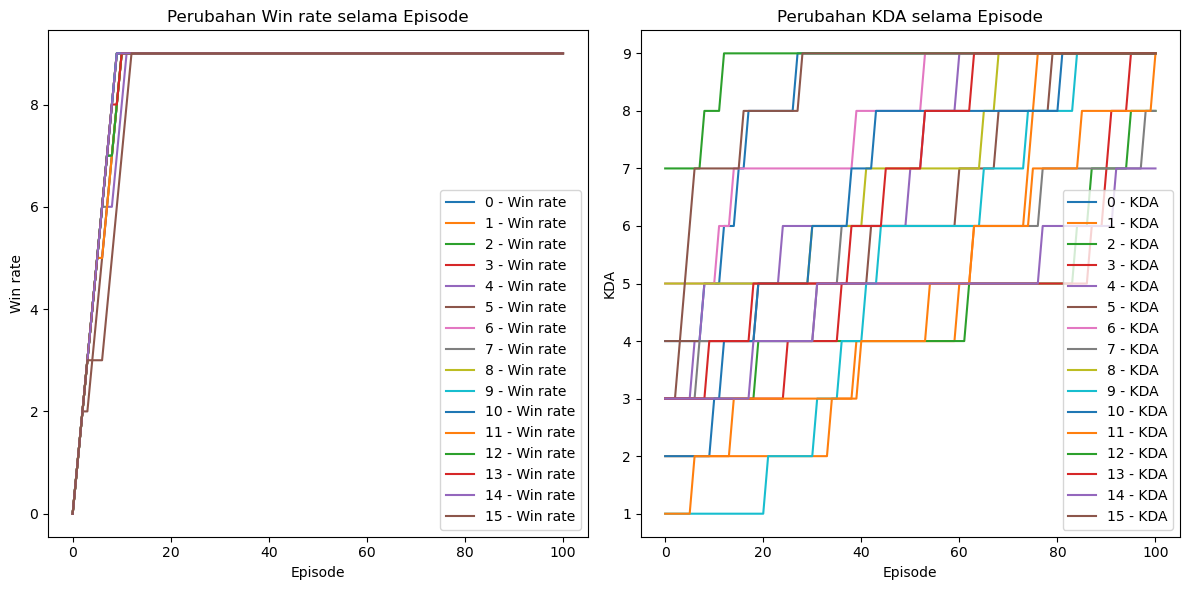

In [26]:
plt.figure(figsize=(12, 6))
for team, history in team_performance_history.items():
    plt.subplot(1, 2, 1)
    plt.plot(history['Win rate'], label=f'{team} - Win rate')
    plt.title('Perubahan Win rate selama Episode')
    plt.xlabel('Episode')
    plt.ylabel('Win rate')
    plt.legend(loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history['KDA'], label=f'{team} - KDA')
    plt.title('Perubahan KDA selama Episode')
    plt.xlabel('Episode')
    plt.ylabel('KDA')
    plt.legend(loc='lower right')
    
plt.tight_layout()
plt.show()
